# Ensemble Methods
The goal of ensemble methods is to combine the predications of several base estimators built with a given learning algorithms in order to improve generalizability/robustness over a single estimator.
Two families of ensemble methods are usually distinguished:
    1. averaging methods
    2. boosting methods

In [1]:
from sklearn.feature_selection import VarianceThreshold
X=[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel=VarianceThreshold(threshold=(0.8*(1-0.8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [2]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics


Automatically created module for IPython interactive environment


In [3]:
digits=datasets.load_digits()

In [4]:
Data=digits.images
Data.shape

(1797, 8, 8)

In [5]:
tar=digits.target
tar.shape

(1797,)

In [6]:
df=list(zip(Data,tar))
df[:2]

[(array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
         [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
         [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
         [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
         [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
         [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
         [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
         [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]]), 0),
 (array([[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
         [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
         [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]]), 1)]

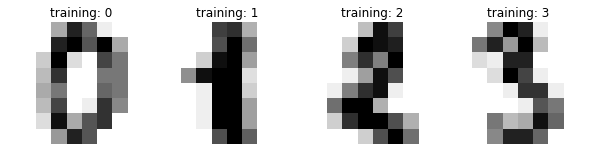

In [7]:
plt.figure(figsize=(10,10))
for index,(image,label) in enumerate(df[:4]):
    plt.subplot(1,4,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('training: %i'%label)
plt.show()

In [8]:
n_samples=len(digits.images)
n_samples

1797

In [9]:
data=digits.images.reshape(n_samples,-1)
data.shape

(1797, 64)

In [10]:
clf=svm.SVC(gamma=0.001)

clf.fit(data[:n_samples//2],digits.target[:n_samples//2])
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
expected=digits.target[n_samples//2:]
predicate=clf.predict(data[n_samples//2:])

In [12]:
print("Classification report for classifier: %s:\n%s\n"
      %(clf,metrics.classification_report(expected,predicate)))

Classification report for classifier: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




In [13]:
print("Confusion matrix: \n%s"
     %metrics.confusion_matrix(expected,predicate))

Confusion matrix: 
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


In [14]:
images_and_pred=list(zip(digits.images[n_samples//2:],predicate))

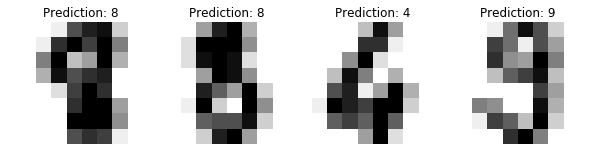

In [15]:
plt.figure(figsize=(10,10))
for index,(image,prediction) in enumerate(images_and_pred[:4]):
    plt.subplot(1,4,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Prediction: %i'%prediction)
plt.show()

# Confusion Matrix
Working with svc and iris dataset


In [16]:
print(__doc__)
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Automatically created module for IPython interactive environment


In [17]:
iris=datasets.load_iris()
X=iris.data
Y=iris.target
class_name=iris.target_names

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [19]:
clf=svm.SVC(kernel='linear',C=0.01)

In [20]:
y_pred=clf.fit(X_train,y_train).predict(X_test)

In [21]:
def plot_confusion_matrix(cm,classes,normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment="center",
                color="white" if cm[i,j]>thresh else "black")
        plt.tight_layout()
        plt.ylabel('true label')
        plt.xlabel('Predicate label')


In [22]:
cnf_matrix=confusion_matrix(y_test,y_pred)

In [23]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.62  0.38]
 [ 0.    0.    1.  ]]


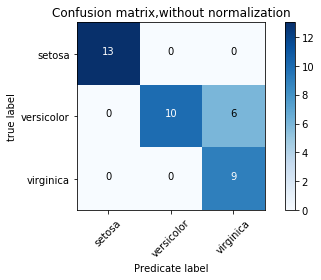

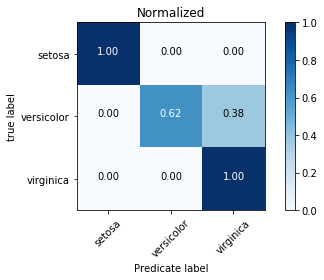

In [24]:
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_name,
                     title='Confusion matrix,without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_name,normalize=True,
                     title='Normalized')
plt.show()